### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 4
### Due: Friday, Sep 22 at 11:59 pm CT

## Problem 1

This one is on correlation coefficients. We want to find the link between the price of a 500 ml bottle of water and the distance from the city center. We might expect to find that the price of a bottle of water decreases as the distance from the city center increases. Higher property rents close to the city center should be reflected in higher prices in the shops.

The hypothesis might be written like this:
"The price of a water bottle decreases as distance from the city center increases."

The more objective scientific research method is always to assume that no such price-distance relationship exists (i.e., there is no correlation) and to express the null hypothesis as:
"There is no significant relationship between the price of a water bottle and distance from the city center."

The data are given in the table below. Compute the Pearson's, Spearman's, and Kendall's correlation coefficients and find the significance level by which the null hypothesis is rejected. Show all your calculation and work using python and Markdown. 

| Distance (m)| price ($) |
|-------- | ------- |
| 50  | 1.80    |
| 175 | 1.20    |
| 270 | 2.00    |
| 375 | 1.50    |
| 425 | 0.80    |
| 580 | 0.60    |
| 710 | 1.05    |
| 790 | 0.85    |
| 890 | 0.90    |
| 980 | 1.00    |
| 1000| 0.95    |

In [6]:
import numpy as np
from scipy import stats

# Data
distance = np.array([50, 175, 270, 375, 425, 580, 710, 790, 890, 980, 1000])
price = np.array([1.80, 1.20, 2.00, 1.50, 0.80, 0.60, 1.05, 0.85, 0.90, 1.00, 0.95])

# Calculate Pearson's correlation coefficient and its p-value
pearson_corr, pearson_p_value = stats.pearsonr(distance, price)

# Calculate Spearman's correlation coefficient and its p-value
spearman_corr, spearman_p_value = stats.spearmanr(distance, price)

# Calculate Kendall's correlation coefficient and its p-value
kendall_corr, kendall_p_value = stats.kendalltau(distance, price)


# Print the results
print(f"Pearson's Correlation Coefficient: {pearson_corr:.5f}, p-value: {pearson_p_value:.5f}")
print(f"Spearman's Correlation Coefficient: {spearman_corr:.5f}, p-value: {spearman_p_value:.5f}")
print(f"Kendall's Correlation Coefficient: {kendall_corr:.5f}, p-value: {kendall_p_value:.5f}")



Pearson's Correlation Coefficient: -0.64937, p-value: 0.03060
Spearman's Correlation Coefficient: -0.55455, p-value: 0.07665
Kendall's Correlation Coefficient: -0.34545, p-value: 0.16457


<h2> Testing the Null Hypothesis </h2>

In [7]:
#Just for reference
# Significance level
alpha = 0.05  # This value will be compared against the p-values of different correlation coefficients

According to convention, if the p-value is less than or equal to 0.05, We reject the null hypthesis. So in our case we can reject the Null Hypothesis for Pearson. Physically it means that there is a definite correlation between distance and price. 

On the other hand, for both Kendall and Spearman, the p-values are greater than 0.05. Here the null hypothesis is true. Physically, it means that there is no significant relationship between the price of a water bottle and distance from the city center.

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

<h1> 2.1 </h1>

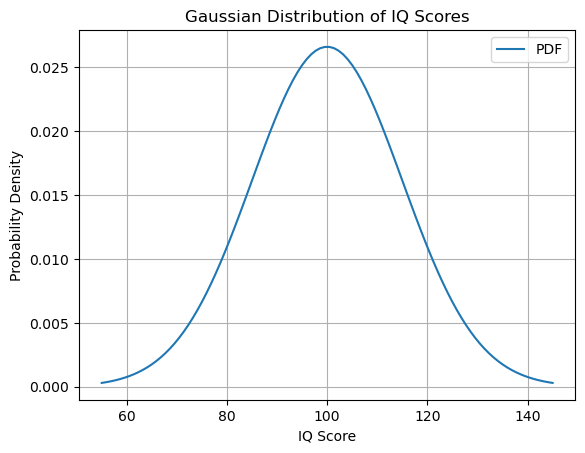

10 Random Draws: [ 81.59235649 101.5677368  107.72373297  96.59636476 104.42453516
  91.6314722   94.88995865  95.31400147 118.68657873  93.05833082]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters of the Gaussian distribution
mean = 100
std_deviation = 15

# Create a Gaussian distribution object
gaussian_dist = norm(loc=mean, scale=std_deviation)

# Plot the Gaussian distribution
x = np.linspace(mean - 3*std_deviation, mean + 3*std_deviation, 100)
plt.plot(x, gaussian_dist.pdf(x), label='PDF')
plt.xlabel('IQ Score')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution of IQ Scores')
plt.grid()
plt.legend()
plt.show()

# Generate 10 random draws from the distribution
random_draws = gaussian_dist.rvs(size=10)
print(f'10 Random Draws: {random_draws}')

# Calculate the PDF at 𝑥=145
x_value = 145
pdf_at_x = gaussian_dist.pdf(x_value)



In [12]:
print(f'PDF at x={x_value}: {pdf_at_x:.6f}')

PDF at x=145: 0.000295


<h1> 2.2 </h1>

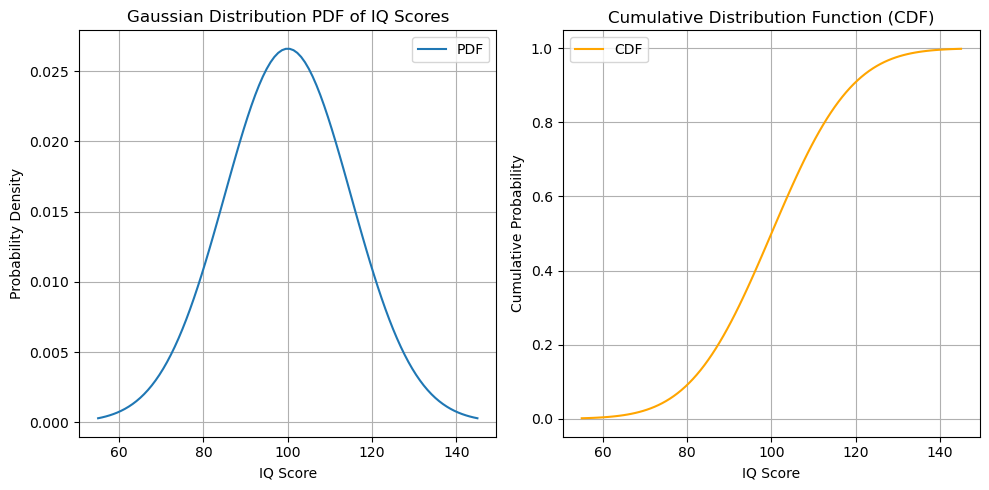

In [14]:


# Define the x-range for plotting
x = np.linspace(mean - 3*std_deviation, mean + 3*std_deviation, 100)

# Plot the Gaussian distribution PDF (same as in part 1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, gaussian_dist.pdf(x), label='PDF')
plt.xlabel('IQ Score')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution PDF of IQ Scores')
plt.grid()
plt.legend()

# Access the CDF (cumulative distribution function) and plot it
cdf = gaussian_dist.cdf(x)
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF', color='orange')
plt.xlabel('IQ Score')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Inverse transform sampling to draw 10^4 random samples
num_samples = 10**4
random_samples = gaussian_dist.ppf(np.random.rand(num_samples))



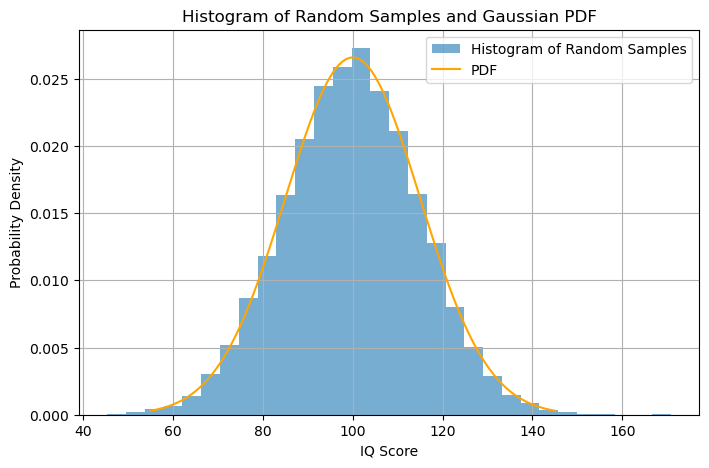

In [15]:
# Plot a histogram of the random samples
plt.figure(figsize=(8, 5))
plt.hist(random_samples, bins=30, density=True, alpha=0.6, label='Histogram of Random Samples')
plt.plot(x, gaussian_dist.pdf(x), label='PDF', color='orange')
plt.xlabel('IQ Score')
plt.ylabel('Probability Density')
plt.title('Histogram of Random Samples and Gaussian PDF')
plt.grid()
plt.legend()
plt.show()


In [18]:
# Calculate the probability that IQ is less than or equal to 145
probability_less_than_145 = gaussian_dist.cdf(145)

# Calculate the complement to find the probability that IQ is greater than 145
probability_greater_than_145 = 1 - probability_less_than_145

# Print the result
print(f"The fraction of people with IQ > 145 is approximately: {probability_greater_than_145:.8f}")


The fraction of people with IQ > 145 is approximately: 0.00134990


In [19]:
# Calculate the IQ score that corresponds to "one in a million" (0.000001)
iq_one_in_a_million = gaussian_dist.ppf(1 - 0.000001)

# Print the result
print(f"The IQ score corresponding to 'one in a million' is approximately: {iq_one_in_a_million:.2f}")

The IQ score corresponding to 'one in a million' is approximately: 171.30
